# Weight Initialization

## Why Are DL Model Weights Initialized Randomly?

```text
- Stochastic gradient descent: The most common method for training deep learning models is stochastic gradient descent (SGD). SGD works by iteratively adjusting the model weights in the direction of the negative gradient of the loss function. This means that the model weights are constantly changing during training. If the weights are initialized to the same value, then they will all move in the same direction, and the model will not be able to learn.

- Avoiding local optima: In deep learning, models are optimized using gradient-based optimization algorithms like stochastic gradient descent (SGD). Random initialization helps avoid situations where all the weights get stuck in a poor local optimum. By starting with random weights, the model explores a broader range of solutions during training.

- Vanishing and exploding gradients: Another problem with initializing the weights to the same value is that it can lead to vanishing or exploding gradients. Vanishing gradients occur when the weights are too small, and the gradient of the loss function becomes too small to update the weights effectively. Exploding gradients occur when the weights are too large, and the gradient of the loss function becomes too large, which can cause the model to diverge.

- Stability: Initializing the weights randomly helps to ensure that the model is stable during training. If the weights are initialized to the same value, then the model may be very sensitive to small changes in the data, which can make it difficult to train.

- Breaking symmetry: If all the weights were initialized to the same value, the neurons in the network would compute the same updates during backpropagation. As a result, all the neurons would remain symmetric and learn the same features, limiting the expressiveness of the model. Random initialization helps break this symmetry and allows neurons to learn distinct features.

- Initializing with small values: Random initialization typically involves sampling weights from a Gaussian distribution with mean zero and a small standard deviation. This practice helps prevent large initial outputs and gradients that could lead to instability during training. Starting with small values allows for more stable updates and smoother convergence.
```

In [1]:
# Built-in library
import logging
from typing import Any, Optional, Sequence, Union

# Standard imports
import numpy as np
import numpy.typing as npt
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Configure the backend
import matplotlib_inline.backend_inline

# Pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 2_000

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")
import seaborn as sns

# Custom import
from src.utilities import (
    set_up_logger,
    create_iris_data,
    create_qwerties_data,
    smooth,
)
from src.data_manager import (
    load_data,
    create_data_loader,
    split_into_train_n_validation,
)
from src.preprocessor import Standardizer, Normalizer


# Black code formatter (Optional)
%load_ext lab_black
# auto reload imports
%load_ext autoreload
%autoreload 2

In [2]:
fp = "../../data/mnist_digit/mnist_train.csv"
mnist_data = load_data(filename=fp)

mnist_data.head()

Shape of data: (60000, 785)



,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,2x12,2x13,2x14,2x15,2x16,2x17,2x18,2x19,2x20,2x21,2x22,2x23,2x24,2x25,2x26,2x27,2x28,3x1,3x2,3x3,3x4,3x5,3x6,3x7,3x8,3x9,3x10,3x11,3x12,3x13,3x14,3x15,3x16,3x17,3x18,3x19,3x20,3x21,3x22,3x23,3x24,3x25,3x26,3x27,3x28,4x1,4x2,4x3,4x4,4x5,4x6,4x7,4x8,4x9,4x10,4x11,4x12,4x13,4x14,4x15,4x16,4x17,4x18,4x19,4x20,4x21,4x22,4x23,4x24,4x25,4x26,4x27,4x28,5x1,5x2,5x3,5x4,5x5,5x6,5x7,5x8,5x9,5x10,5x11,5x12,5x13,5x14,5x15,5x16,5x17,5x18,5x19,5x20,5x21,5x22,5x23,5x24,5x25,5x26,5x27,5x28,6x1,6x2,6x3,6x4,6x5,6x6,6x7,6x8,6x9,6x10,6x11,6x12,6x13,6x14,6x15,6x16,6x17,6x18,6x19,6x20,6x21,6x22,6x23,6x24,6x25,6x26,6x27,6x28,7x1,7x2,7x3,7x4,7x5,7x6,7x7,7x8,7x9,7x10,7x11,7x12,7x13,7x14,7x15,7x16,7x17,7x18,7x19,7x20,7x21,7x22,7x23,7x24,7x25,7x26,7x27,7x28,8x1,8x2,8x3,8x4,8x5,8x6,8x7,8x8,8x9,8x10,8x11,8x12,8x13,8x14,8x15,8x16,8x17,8x18,8x19,8x20,8x21,8x22,8x23,8x24,8x25,8x26,8x27,8x28,9x1,9x2,9x3,9x4,9x5,9x6,9x7,9x8,9x9,9x10,9x11,9x12,9x13,9x14,9x15,9x16,9x17,9x18,9x19,9x20,9x21,9x22,9x23,9x24,9x25,9x26,9x27,9x28,10x1,10x2,10x3,10x4,10x5,10x6,10x7,10x8,10x9,10x10,10x11,10x12,10x13,10x14,10x15,10x16,10x17,10x18,10x19,10x20,10x21,10x22,10x23,10x24,10x25,10x26,10x27,10x28,11x1,11x2,11x3,11x4,11x5,11x6,11x7,11x8,11x9,11x10,11x11,11x12,11x13,11x14,11x15,11x16,11x17,11x18,11x19,11x20,11x21,11x22,11x23,11x24,11x25,11x26,11x27,11x28,12x1,12x2,12x3,12x4,12x5,12x6,12x7,12x8,12x9,12x10,12x11,12x12,12x13,12x14,12x15,12x16,12x17,12x18,12x19,12x20,12x21,12x22,12x23,12x24,12x25,12x26,12x27,12x28,13x1,13x2,13x3,13x4,13x5,13x6,13x7,13x8,13x9,13x10,13x11,13x12,13x13,13x14,13x15,13x16,13x17,13x18,13x19,13x20,13x21,13x22,13x23,13x24,13x25,13x26,13x27,13x28,14x1,14x2,14x3,14x4,14x5,14x6,14x7,14x8,14x9,14x10,14x11,14x12,14x13,14x14,14x15,14x16,14x17,14x18,14x19,14x20,14x21,14x22,14x23,14x24,14x25,14x26,14x27,14x28,15x1,15x2,15x3,15x4,15x5,15x6,15x7,15x8,15x9,15x10,15x11,15x12,15x13,15x14,15x15,15x16,15x17,15x18,15x19,15x20,15x21,15x22,15x23,15x24,15x25,15x26,15x27,15x28,16x1,16x2,16x3,16x4,16x5,16x6,16x7,16x8,16x9,16x10,16x11,16x12,16x13,16x14,16x15,16x16,16x17,16x18,16x19,16x20,16x21,16x22,16x23,16x24,16x25,16x26,16x27,16x28,17x1,17x2,17x3,17x4,17x5,17x6,17x7,17x8,17x9,17x10,17x11,17x12,17x13,17x14,17x15,17x16,17x17,17x18,17x19,17x20,17x21,17x22,17x23,17x24,17x25,17x26,17x27,17x28,18x1,18x2,18x3,18x4,18x5,18x6,18x7,18x8,18x9,18x10,18x11,18x12,18x13,18x14,18x15,18x16,18x17,18x18,18x19,18x20,18x21,18x22,18x23,18x24,18x25,18x26,18x27,18x28,19x1,19x2,19x3,19x4,19x5,19x6,19x7,19x8,19x9,19x10,19x11,19x12,19x13,19x14,19x15,19x16,19x17,19x18,19x19,19x20,19x21,19x22,19x23,19x24,19x25,19x26,19x27,19x28,20x1,20x2,20x3,20x4,20x5,20x6,20x7,20x8,20x9,20x10,20x11,20x12,20x13,20x14,20x15,20x16,20x17,20x18,20x19,20x20,20x21,20x22,20x23,20x24,20x25,20x26,20x27,20x28,21x1,21x2,21x3,21x4,21x5,21x6,21x7,21x8,21x9,21x10,21x11,21x12,21x13,21x14,21x15,21x16,21x17,21x18,21x19,21x20,21x21,21x22,21x23,21x24,21x25,21x26,21x27,21x28,22x1,22x2,22x3,22x4,22x5,22x6,22x7,22x8,22x9,22x10,22x11,22x12,22x13,22x14,22x15,22x16,22x17,22x18,22x19,22x20,22x21,22x22,22x23,22x24,22x25,22x26,22x27,22x28,23x1,23x2,23x3,23x4,23x5,23x6,23x7,23x8,23x9,23x10,23x11,23x12,23x13,23x14,23x15,23x16,23x17,23x18,23x19,23x20,23x21,23x22,23x23,23x24,23x25,23x26,23x27,23x28,24x1,24x2,24x3,24x4,24x5,24x6,24x7,24x8,24x9,24x10,24x11,24x12,24x13,24x14,24x15,24x16,24x17,24x18,24x19,24x20,24x21,24x22,24x23,24x24,24x25,24x26,24x27,24x28,25x1,25x2,25x3,25x4,25x5,25x6,25x7,25x8,25x9,25x10,25x11,25x12,25x13,25x14,25x15,25x16,25x17,25x18,25x19,25x20,25x21,25x22,25x23,25x24,25x25,25x26,25x27,25x28,26x1,26x2,26x3,26x4,26x5,26x6,26x7,26x8,26x9,26x10,26x11,26x12,26x13,26x14,26x15,26x16,26x17,26x18,26x19,26x20,26x21,26x22,26x23,26x24,26x25,26x26,26x27,26x28,27x1,27x2,27x3,27x4,27x5,27x6,27x7,27x8,27x9,27x10,27x11,27x12,27x13,27x14,27x15,27x16,27x17,27x18,27x19,27x20,

In [3]:
X = mnist_data.iloc[:, 1:]
y = mnist_data.iloc[:, 0]

X.shape, y.shape, y.unique()

((60000, 784), (60000,), array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8]))

In [4]:
X.describe()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,2x12,2x13,2x14,2x15,2x16,2x17,2x18,2x19,2x20,2x21,2x22,2x23,2x24,2x25,2x26,2x27,2x28,3x1,3x2,3x3,3x4,3x5,3x6,3x7,3x8,3x9,3x10,3x11,3x12,3x13,3x14,3x15,3x16,3x17,3x18,3x19,3x20,3x21,3x22,3x23,3x24,3x25,3x26,3x27,3x28,4x1,4x2,4x3,4x4,4x5,4x6,4x7,4x8,4x9,4x10,4x11,4x12,4x13,4x14,4x15,4x16,4x17,4x18,4x19,4x20,4x21,4x22,4x23,4x24,4x25,4x26,4x27,4x28,5x1,5x2,5x3,5x4,5x5,5x6,5x7,5x8,5x9,5x10,5x11,5x12,5x13,5x14,5x15,5x16,5x17,5x18,5x19,5x20,5x21,5x22,5x23,5x24,5x25,5x26,5x27,5x28,6x1,6x2,6x3,6x4,6x5,6x6,6x7,6x8,6x9,6x10,6x11,6x12,6x13,6x14,6x15,6x16,6x17,6x18,6x19,6x20,6x21,6x22,6x23,6x24,6x25,6x26,6x27,6x28,7x1,7x2,7x3,7x4,7x5,7x6,7x7,7x8,7x9,7x10,7x11,7x12,7x13,7x14,7x15,7x16,7x17,7x18,7x19,7x20,7x21,7x22,7x23,7x24,7x25,7x26,7x27,7x28,8x1,8x2,8x3,8x4,8x5,8x6,8x7,8x8,8x9,8x10,8x11,8x12,8x13,8x14,8x15,8x16,8x17,8x18,8x19,8x20,8x21,8x22,8x23,8x24,8x25,8x26,8x27,8x28,9x1,9x2,9x3,9x4,9x5,9x6,9x7,9x8,9x9,9x10,9x11,9x12,9x13,9x14,9x15,9x16,9x17,9x18,9x19,9x20,9x21,9x22,9x23,9x24,9x25,9x26,9x27,9x28,10x1,10x2,10x3,10x4,10x5,10x6,10x7,10x8,10x9,10x10,10x11,10x12,10x13,10x14,10x15,10x16,10x17,10x18,10x19,10x20,10x21,10x22,10x23,10x24,10x25,10x26,10x27,10x28,11x1,11x2,11x3,11x4,11x5,11x6,11x7,11x8,11x9,11x10,11x11,11x12,11x13,11x14,11x15,11x16,11x17,11x18,11x19,11x20,11x21,11x22,11x23,11x24,11x25,11x26,11x27,11x28,12x1,12x2,12x3,12x4,12x5,12x6,12x7,12x8,12x9,12x10,12x11,12x12,12x13,12x14,12x15,12x16,12x17,12x18,12x19,12x20,12x21,12x22,12x23,12x24,12x25,12x26,12x27,12x28,13x1,13x2,13x3,13x4,13x5,13x6,13x7,13x8,13x9,13x10,13x11,13x12,13x13,13x14,13x15,13x16,13x17,13x18,13x19,13x20,13x21,13x22,13x23,13x24,13x25,13x26,13x27,13x28,14x1,14x2,14x3,14x4,14x5,14x6,14x7,14x8,14x9,14x10,14x11,14x12,14x13,14x14,14x15,14x16,14x17,14x18,14x19,14x20,14x21,14x22,14x23,14x24,14x25,14x26,14x27,14x28,15x1,15x2,15x3,15x4,15x5,15x6,15x7,15x8,15x9,15x10,15x11,15x12,15x13,15x14,15x15,15x16,15x17,15x18,15x19,15x20,15x21,15x22,15x23,15x24,15x25,15x26,15x27,15x28,16x1,16x2,16x3,16x4,16x5,16x6,16x7,16x8,16x9,16x10,16x11,16x12,16x13,16x14,16x15,16x16,16x17,16x18,16x19,16x20,16x21,16x22,16x23,16x24,16x25,16x26,16x27,16x28,17x1,17x2,17x3,17x4,17x5,17x6,17x7,17x8,17x9,17x10,17x11,17x12,17x13,17x14,17x15,17x16,17x17,17x18,17x19,17x20,17x21,17x22,17x23,17x24,17x25,17x26,17x27,17x28,18x1,18x2,18x3,18x4,18x5,18x6,18x7,18x8,18x9,18x10,18x11,18x12,18x13,18x14,18x15,18x16,18x17,18x18,18x19,18x20,18x21,18x22,18x23,18x24,18x25,18x26,18x27,18x28,19x1,19x2,19x3,19x4,19x5,19x6,19x7,19x8,19x9,19x10,19x11,19x12,19x13,19x14,19x15,19x16,19x17,19x18,19x19,19x20,19x21,19x22,19x23,19x24,19x25,19x26,19x27,19x28,20x1,20x2,20x3,20x4,20x5,20x6,20x7,20x8,20x9,20x10,20x11,20x12,20x13,20x14,20x15,20x16,20x17,20x18,20x19,20x20,20x21,20x22,20x23,20x24,20x25,20x26,20x27,20x28,21x1,21x2,21x3,21x4,21x5,21x6,21x7,21x8,21x9,21x10,21x11,21x12,21x13,21x14,21x15,21x16,21x17,21x18,21x19,21x20,21x21,21x22,21x23,21x24,21x25,21x26,21x27,21x28,22x1,22x2,22x3,22x4,22x5,22x6,22x7,22x8,22x9,22x10,22x11,22x12,22x13,22x14,22x15,22x16,22x17,22x18,22x19,22x20,22x21,22x22,22x23,22x24,22x25,22x26,22x27,22x28,23x1,23x2,23x3,23x4,23x5,23x6,23x7,23x8,23x9,23x10,23x11,23x12,23x13,23x14,23x15,23x16,23x17,23x18,23x19,23x20,23x21,23x22,23x23,23x24,23x25,23x26,23x27,23x28,24x1,24x2,24x3,24x4,24x5,24x6,24x7,24x8,24x9,24x10,24x11,24x12,24x13,24x14,24x15,24x16,24x17,24x18,24x19,24x20,24x21,24x22,24x23,24x24,24x25,24x26,24x27,24x28,25x1,25x2,25x3,25x4,25x5,25x6,25x7,25x8,25x9,25x10,25x11,25x12,25x13,25x14,25x15,25x16,25x17,25x18,25x19,25x20,25x21,25x22,25x23,25x24,25x25,25x26,25x27,25x28,26x1,26x2,26x3,26x4,26x5,26x6,26x7,26x8,26x9,26x10,26x11,26x12,26x13,26x14,26x15,26x16,26x17,26x18,26x19,26x20,26x21,26x22,26x23,26x24,26x25,26x26,26x27,26x28,27x1,27x2,27x3,27x4,27x5,27x6,27x7,27x8,27x9,27x10,27x11,27x12,27x13,27x14,27x15,27x16,27x17,27x18,27x19,27x20,27x21,

In [5]:
# Normalize data
X_norm = X / np.max(X)  # Since np.min(X) = 0

X_norm.describe()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,2x12,2x13,2x14,2x15,2x16,2x17,2x18,2x19,2x20,2x21,2x22,2x23,2x24,2x25,2x26,2x27,2x28,3x1,3x2,3x3,3x4,3x5,3x6,3x7,3x8,3x9,3x10,3x11,3x12,3x13,3x14,3x15,3x16,3x17,3x18,3x19,3x20,3x21,3x22,3x23,3x24,3x25,3x26,3x27,3x28,4x1,4x2,4x3,4x4,4x5,4x6,4x7,4x8,4x9,4x10,4x11,4x12,4x13,4x14,4x15,4x16,4x17,4x18,4x19,4x20,4x21,4x22,4x23,4x24,4x25,4x26,4x27,4x28,5x1,5x2,5x3,5x4,5x5,5x6,5x7,5x8,5x9,5x10,5x11,5x12,5x13,5x14,5x15,5x16,5x17,5x18,5x19,5x20,5x21,5x22,5x23,5x24,5x25,5x26,5x27,5x28,6x1,6x2,6x3,6x4,6x5,6x6,6x7,6x8,6x9,6x10,6x11,6x12,6x13,6x14,6x15,6x16,6x17,6x18,6x19,6x20,6x21,6x22,6x23,6x24,6x25,6x26,6x27,6x28,7x1,7x2,7x3,7x4,7x5,7x6,7x7,7x8,7x9,7x10,7x11,7x12,7x13,7x14,7x15,7x16,7x17,7x18,7x19,7x20,7x21,7x22,7x23,7x24,7x25,7x26,7x27,7x28,8x1,8x2,8x3,8x4,8x5,8x6,8x7,8x8,8x9,8x10,8x11,8x12,8x13,8x14,8x15,8x16,8x17,8x18,8x19,8x20,8x21,8x22,8x23,8x24,8x25,8x26,8x27,8x28,9x1,9x2,9x3,9x4,9x5,9x6,9x7,9x8,9x9,9x10,9x11,9x12,9x13,9x14,9x15,9x16,9x17,9x18,9x19,9x20,9x21,9x22,9x23,9x24,9x25,9x26,9x27,9x28,10x1,10x2,10x3,10x4,10x5,10x6,10x7,10x8,10x9,10x10,10x11,10x12,10x13,10x14,10x15,10x16,10x17,10x18,10x19,10x20,10x21,10x22,10x23,10x24,10x25,10x26,10x27,10x28,11x1,11x2,11x3,11x4,11x5,11x6,11x7,11x8,11x9,11x10,11x11,11x12,11x13,11x14,11x15,11x16,11x17,11x18,11x19,11x20,11x21,11x22,11x23,11x24,11x25,11x26,11x27,11x28,12x1,12x2,12x3,12x4,12x5,12x6,12x7,12x8,12x9,12x10,12x11,12x12,12x13,12x14,12x15,12x16,12x17,12x18,12x19,12x20,12x21,12x22,12x23,12x24,12x25,12x26,12x27,12x28,13x1,13x2,13x3,13x4,13x5,13x6,13x7,13x8,13x9,13x10,13x11,13x12,13x13,13x14,13x15,13x16,13x17,13x18,13x19,13x20,13x21,13x22,13x23,13x24,13x25,13x26,13x27,13x28,14x1,14x2,14x3,14x4,14x5,14x6,14x7,14x8,14x9,14x10,14x11,14x12,14x13,14x14,14x15,14x16,14x17,14x18,14x19,14x20,14x21,14x22,14x23,14x24,14x25,14x26,14x27,14x28,15x1,15x2,15x3,15x4,15x5,15x6,15x7,15x8,15x9,15x10,15x11,15x12,15x13,15x14,15x15,15x16,15x17,15x18,15x19,15x20,15x21,15x22,15x23,15x24,15x25,15x26,15x27,15x28,16x1,16x2,16x3,16x4,16x5,16x6,16x7,16x8,16x9,16x10,16x11,16x12,16x13,16x14,16x15,16x16,16x17,16x18,16x19,16x20,16x21,16x22,16x23,16x24,16x25,16x26,16x27,16x28,17x1,17x2,17x3,17x4,17x5,17x6,17x7,17x8,17x9,17x10,17x11,17x12,17x13,17x14,17x15,17x16,17x17,17x18,17x19,17x20,17x21,17x22,17x23,17x24,17x25,17x26,17x27,17x28,18x1,18x2,18x3,18x4,18x5,18x6,18x7,18x8,18x9,18x10,18x11,18x12,18x13,18x14,18x15,18x16,18x17,18x18,18x19,18x20,18x21,18x22,18x23,18x24,18x25,18x26,18x27,18x28,19x1,19x2,19x3,19x4,19x5,19x6,19x7,19x8,19x9,19x10,19x11,19x12,19x13,19x14,19x15,19x16,19x17,19x18,19x19,19x20,19x21,19x22,19x23,19x24,19x25,19x26,19x27,19x28,20x1,20x2,20x3,20x4,20x5,20x6,20x7,20x8,20x9,20x10,20x11,20x12,20x13,20x14,20x15,20x16,20x17,20x18,20x19,20x20,20x21,20x22,20x23,20x24,20x25,20x26,20x27,20x28,21x1,21x2,21x3,21x4,21x5,21x6,21x7,21x8,21x9,21x10,21x11,21x12,21x13,21x14,21x15,21x16,21x17,21x18,21x19,21x20,21x21,21x22,21x23,21x24,21x25,21x26,21x27,21x28,22x1,22x2,22x3,22x4,22x5,22x6,22x7,22x8,22x9,22x10,22x11,22x12,22x13,22x14,22x15,22x16,22x17,22x18,22x19,22x20,22x21,22x22,22x23,22x24,22x25,22x26,22x27,22x28,23x1,23x2,23x3,23x4,23x5,23x6,23x7,23x8,23x9,23x10,23x11,23x12,23x13,23x14,23x15,23x16,23x17,23x18,23x19,23x20,23x21,23x22,23x23,23x24,23x25,23x26,23x27,23x28,24x1,24x2,24x3,24x4,24x5,24x6,24x7,24x8,24x9,24x10,24x11,24x12,24x13,24x14,24x15,24x16,24x17,24x18,24x19,24x20,24x21,24x22,24x23,24x24,24x25,24x26,24x27,24x28,25x1,25x2,25x3,25x4,25x5,25x6,25x7,25x8,25x9,25x10,25x11,25x12,25x13,25x14,25x15,25x16,25x17,25x18,25x19,25x20,25x21,25x22,25x23,25x24,25x25,25x26,25x27,25x28,26x1,26x2,26x3,26x4,26x5,26x6,26x7,26x8,26x9,26x10,26x11,26x12,26x13,26x14,26x15,26x16,26x17,26x18,26x19,26x20,26x21,26x22,26x23,26x24,26x25,26x26,26x27,26x28,27x1,27x2,27x3,27x4,27x5,27x6,27x7,27x8,27x9,27x10,27x11,27x12,27x13,27x14,27x15,27x16,27x17,27x18,27x19,27x20,27x21,

In [6]:
BATCH_SIZE = 16

# Split data into train and validation sets
X_train, X_validation, y_train, y_validation = split_into_train_n_validation(
    data=X_norm, labels=y, convert_to_long=True
)

# Dataloader objects
train_DL, validation_DL = create_data_loader(
    X_train=X_train,
    X_validation=X_validation,
    y_train=y_train,
    y_validation=y_validation,
    batch_size=BATCH_SIZE,
)

[INFO]:: 2023-06-12 19:34:30,840:: X_train: torch.Size([48000, 784])
X_validation: torch.Size([12000, 784])



In [7]:
X.shape, y.nunique()

((60000, 784), 10)

In [8]:
# Build Model
class Net(nn.Module):
    """This is used to build a Feed Forward Network architecture that
    is used for classification."""

    def __init__(self) -> None:
        super().__init__()
        self.input = nn.Linear(784, 32)
        self.hidden_1 = nn.Linear(32, 32)
        self.hidden_2 = nn.Linear(32, 32)
        self.output = nn.Linear(32, 10)

    def forward(self, X: torch.Tensor) -> torch.Tensor:
        """This is used to implement forward prop."""
        X = F.relu(self.input(X))
        X = F.relu(self.hidden_1(X))
        X = F.relu(self.hidden_2(X))
        X = torch.log_softmax(self.output(X), dim=1)
        return X


def train_model(
    *,
    net: Net,
    train_dataloader: DataLoader,
    validation_dataloader: DataLoader,
    epochs: int,
    learning_rate: float,
    optimizer_name: str,
):
    """This is used to train the FFN model."""
    PCT = 100
    __optimizer__ = getattr(torch.optim, optimizer_name)
    optimizer = __optimizer__(params=net.parameters(), lr=learning_rate)
    # Negative log likelihood loss.
    # It is useful to train a classification problem with C classes.
    criterion = nn.NLLLoss()
    train_loss = torch.zeros(size=(epochs,))
    train_accuracy, validation_accuracy = (
        np.zeros(shape=(epochs,)),
        np.zeros(shape=(epochs,)),
    )

    print(f"Training epoch:")
    for epoch_idx in np.arange(epochs):
        net.train()
        batch_accuracy, batch_loss = [], []

        for X_, y_ in train_dataloader:
            # Reset gradients
            optimizer.zero_grad()

            # Forward prop and loss
            y_proba = net(X_)
            loss = criterion(y_proba, y_)

            y_pred = torch.argmax(y_proba, dim=1)
            acc = torch.mean((y_pred == y_).float()) * PCT
            batch_accuracy.append(acc.detach())

            batch_loss.append(loss.detach())

            # Backprop
            loss.backward()
            optimizer.step()

        # Train Metrics
        train_accuracy[epoch_idx] = np.mean(batch_accuracy)
        train_loss[epoch_idx] = np.mean(batch_loss, dtype="float64")

        # Validation Metrics
        net.eval()

        X_val, y_val = next(iter(validation_dataloader))
        y_proba_val = net(X_val)
        y_pred_val = torch.argmax(y_proba_val, dim=1)
        acc_ = torch.mean((y_pred_val == y_val).float()) * PCT
        validation_accuracy[epoch_idx] = acc_
        if epoch_idx % 25 == 0:
            print(f"{epoch_idx} ", end="")

    return (train_accuracy, validation_accuracy, train_loss, net)

In [9]:
EPOCHS, LEARNING_RATE = 50, 0.01
OPTIMIZER_NAME, net = "SGD", Net()

train_accuracy, validation_accuracy, train_loss, trained_net = train_model(
    net=net,
    train_dataloader=train_DL,
    validation_dataloader=validation_DL,
    epochs=EPOCHS,
    learning_rate=LEARNING_RATE,
    optimizer_name=OPTIMIZER_NAME,
)

Training epoch:
0 25 

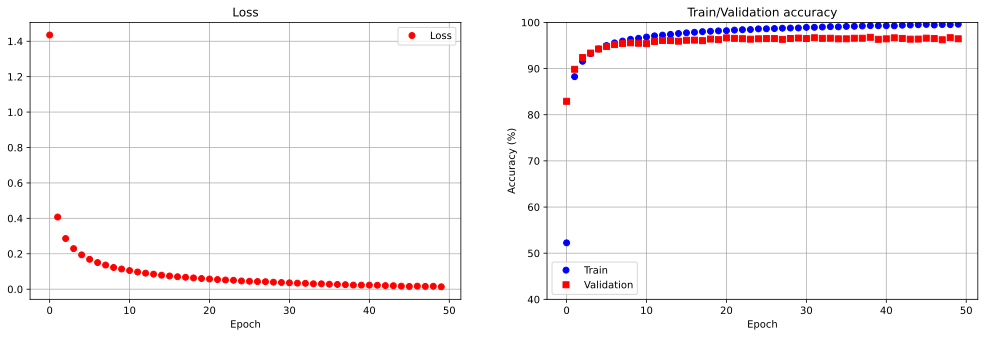

In [10]:
# Visualize the results.
fig, ax = plt.subplots(1, 2, figsize=(17, 5))

ax[0].plot(train_loss, "ro", label="Loss")
ax[0].set_title("Loss")

ax[1].plot(train_accuracy, "bo", label="Train")
ax[1].plot(validation_accuracy, "rs", label="Validation")
ax[1].set_title("Train/Validation accuracy")

# Common features
for idx in range(2):
    ax[idx].legend(loc="best")
    ax[idx].set_xlabel("Epoch")
    if idx > 0:
        ax[idx].set_ylabel("Accuracy (%)")
        ax[idx].set_ylim(40, 100)
    ax[idx].grid()

plt.show()

#### Change The Weights Before Training

In [11]:
# Change the model weights before training
another_net = Net()
print("Initial random weights")
another_net.hidden_1.weight.data

Initial random weights


tensor([[ 0.1618,  0.0630, -0.1521,  ..., -0.0560, -0.0671,  0.0065],
        [-0.0391,  0.1217,  0.1219,  ..., -0.0239,  0.1074, -0.1255],
        [ 0.1528, -0.0455,  0.0173,  ..., -0.1521,  0.0095,  0.0895],
        ...,
        [-0.0436, -0.0541, -0.1111,  ..., -0.0650, -0.1744, -0.0517],
        [-0.1119, -0.0393,  0.1023,  ...,  0.1143,  0.0163, -0.0868],
        [-0.0516,  0.1385, -0.0487,  ..., -0.0703, -0.1593,  0.1728]])

In [12]:
print("Weights after initializing with zero")
another_net.hidden_1.weight.data = torch.zeros_like(another_net.hidden_1.weight)
another_net.hidden_1.weight.data

Weights after initializing with zero


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [13]:
# Train the model
(
    train_accuracy_1,
    validation_accuracy_1,
    train_loss_1,
    another_net_trained,
) = train_model(
    net=another_net,
    train_dataloader=train_DL,
    validation_dataloader=validation_DL,
    epochs=EPOCHS,
    learning_rate=LEARNING_RATE,
    optimizer_name=OPTIMIZER_NAME,
)

Training epoch:
0 25 

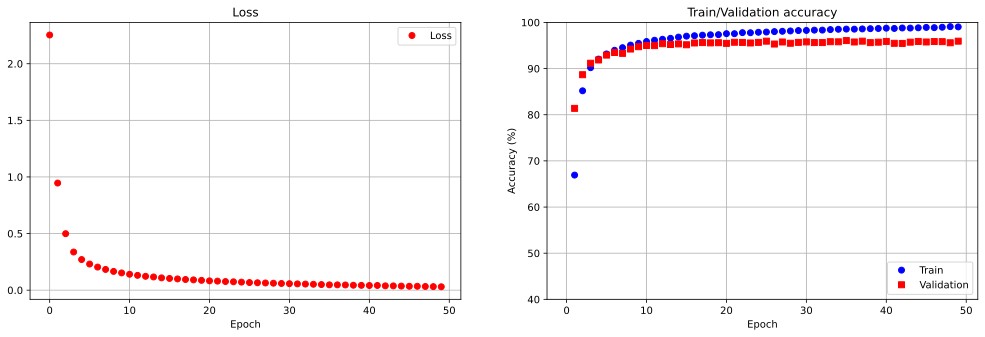

In [14]:
# Visualize the results.
fig, ax = plt.subplots(1, 2, figsize=(17, 5))

ax[0].plot(train_loss_1, "ro", label="Loss")
ax[0].set_title("Loss")

ax[1].plot(train_accuracy_1, "bo", label="Train")
ax[1].plot(validation_accuracy_1, "rs", label="Validation")
ax[1].set_title("Train/Validation accuracy")

# Common features
for idx in range(2):
    ax[idx].legend(loc="best")
    ax[idx].set_xlabel("Epoch")
    if idx > 0:
        ax[idx].set_ylabel("Accuracy (%)")
        ax[idx].set_ylim(40, 100)
    ax[idx].grid()

plt.show()

# The performance of the model is still very high.
# This is because only a layer was initialized with the same value.

In [15]:
# Check the weights after training
another_net.hidden_1.weight.data

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0426,  0.1780, -0.0203,  ...,  0.2281, -0.2900, -0.0427],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.1219,  0.4840, -0.3435,  ...,  0.0334,  0.0309, -0.2571]])

In [16]:
np.histogram(trained_net.hidden_2.weight.data.flatten(), bins=30)

(array([  2,   0,   0,   2,   3,   4,   6,  17,  20,  19,  36,  44, 103,
        114, 104, 127, 111,  84,  56,  42,  45,  34,  13,  12,  10,   8,
          5,   0,   2,   1]),
 array([-0.9587405 , -0.8947557 , -0.83077097, -0.76678616, -0.7028014 ,
        -0.63881665, -0.5748319 , -0.5108471 , -0.44686234, -0.3828776 ,
        -0.3188928 , -0.25490806, -0.19092329, -0.12693852, -0.06295376,
         0.00103101,  0.06501578,  0.12900054,  0.19298531,  0.25697008,
         0.32095483,  0.3849396 ,  0.44892436,  0.5129091 ,  0.5768939 ,
         0.6408787 ,  0.7048634 ,  0.7688482 ,  0.832833  ,  0.89681774,
         0.9608025 ], dtype=float32))

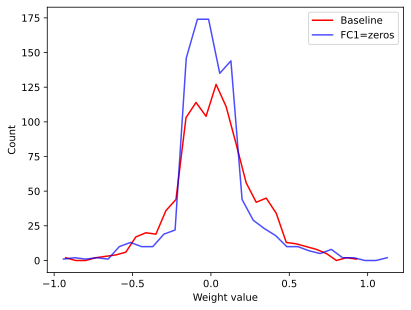

In [17]:
# Show the distributions in a histogram
y, x = np.histogram(trained_net.hidden_2.weight.data.flatten(), bins=30)
plt.plot((x[1:] + x[:-1]) / 2, y, "r", alpha=1, label="Baseline")

# Density estimate
y, x = np.histogram(another_net_trained.hidden_2.weight.data.flatten(), 30)
plt.plot((x[1:] + x[:-1]) / 2, y, "b", alpha=0.7, label="FC1=zeros")

plt.legend()
plt.xlabel("Weight value")
plt.ylabel("Count")
plt.show()


# There's no much difference in the distributions.

#### Set All The Weights To Zero

In [18]:
net_2 = Net()

In [19]:
for param in net_2.named_parameters():
    print(param)
    break

('input.weight', Parameter containing:
tensor([[-0.0103, -0.0044, -0.0100,  ..., -0.0209,  0.0179, -0.0251],
        [-0.0225,  0.0217,  0.0162,  ..., -0.0184, -0.0241, -0.0120],
        [-0.0257,  0.0249, -0.0337,  ..., -0.0189,  0.0136,  0.0245],
        ...,
        [-0.0192, -0.0281,  0.0234,  ..., -0.0141,  0.0060, -0.0061],
        [-0.0316,  0.0196, -0.0129,  ..., -0.0334, -0.0260,  0.0058],
        [ 0.0287,  0.0033, -0.0194,  ...,  0.0028, -0.0163,  0.0192]],
       requires_grad=True))


In [20]:
# Iterate over the params and set them all to zeros
for param in net_2.named_parameters():
    param[1].data = torch.zeros_like(param[1])

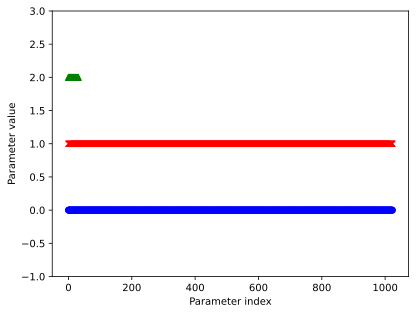

In [21]:
# Confirm for a few select parameters (y-axis offset for visibility).
# i.e. I added an offset to the weights for easy visibility.
plt.plot(0 + net_2.hidden_1.weight.data.flatten(), "bo")
plt.plot(1 + net_2.hidden_2.weight.data.flatten(), "rx")
plt.plot(2 + net_2.hidden_1.bias.data.flatten(), "g^")
plt.xlabel("Parameter index")
plt.ylim([-1, 3])
plt.ylabel("Parameter value")
plt.show()

In [22]:
# Retrain the model
(
    train_accuracy_2,
    validation_accuracy_2,
    train_loss_2,
    another_net_trained_2,
) = train_model(
    net=net_2,
    train_dataloader=train_DL,
    validation_dataloader=validation_DL,
    epochs=EPOCHS,
    learning_rate=LEARNING_RATE,
    optimizer_name=OPTIMIZER_NAME,
)

Training epoch:
0 25 

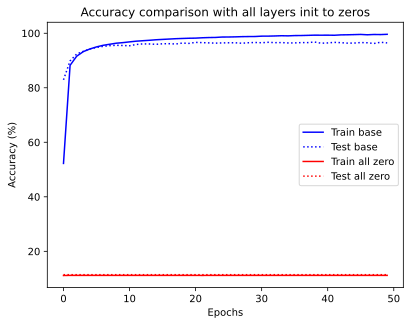

In [23]:
plt.plot(
    range(len(train_accuracy)),
    train_accuracy,
    "b-",
    range(len(validation_accuracy)),
    validation_accuracy,
    "b:",
)
plt.plot(
    range(len(train_accuracy_2)),
    train_accuracy_2,
    "r-",
    range(len(validation_accuracy_2)),
    validation_accuracy_2,
    "r:",
)
plt.legend(["Train base", "Test base", "Train all zero", "Test all zero"])
plt.title("Accuracy comparison with all layers init to zeros")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.show()


# The model with all the weights set to 0 does NOT learn at all.

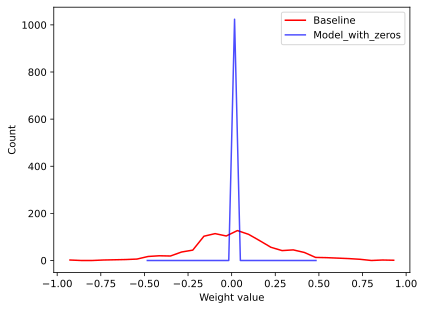

In [24]:
# show the distributions in a histogram
y, x = np.histogram(trained_net.hidden_2.weight.data.flatten(), 30)
plt.plot((x[1:] + x[:-1]) / 2, y, "r", alpha=1, label="Baseline")

# Density estimate
y, x = np.histogram(another_net_trained_2.hidden_2.weight.data.flatten(), 30)
plt.plot((x[1:] + x[:-1]) / 2, y, "b", alpha=0.7, label="Model_with_zeros")

plt.legend()
plt.xlabel("Weight value")
plt.ylabel("Count")
plt.show()

# The distribution of the weights of the baseline is more spread out while
# the distribution of the model with weighted initialized to 0 is centered around 0.

In [25]:
net_3 = Net()
# Iterate over the params and set them all to ones
for param in net_3.named_parameters():
    param[1].data = torch.zeros_like(param[1]) + 1

In [26]:
# Retrain the model
(
    train_accuracy_3,
    validation_accuracy_3,
    train_loss_3,
    another_net_trained_3,
) = train_model(
    net=net_3,
    train_dataloader=train_DL,
    validation_dataloader=validation_DL,
    epochs=EPOCHS,
    learning_rate=LEARNING_RATE,
    optimizer_name=OPTIMIZER_NAME,
)

Training epoch:
0 25 

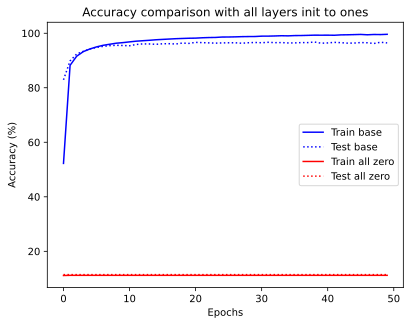

In [27]:
plt.plot(
    range(len(train_accuracy)),
    train_accuracy,
    "b-",
    range(len(validation_accuracy)),
    validation_accuracy,
    "b:",
)
plt.plot(
    range(len(train_accuracy_3)),
    train_accuracy_3,
    "r-",
    range(len(validation_accuracy_3)),
    validation_accuracy_3,
    "r:",
)
plt.legend(["Train base", "Test base", "Train all zero", "Test all zero"])
plt.title("Accuracy comparison with all layers init to ones")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.show()


# The model with all the weights set to 0 does NOT learn at all.

## Weight Variance Initialization

```text
- The purpose of this is to show how to randomly initialize the weights using random values from a normal distribution with mean 0, variance 1 multiplied by a small value (standard deviation).
```

In [28]:
# Create an instance of the model and extract the weights and biases

SIZE, NUM_BINS = 10, 80

#  Range of standard deviations
std_arr = np.logspace(np.log(0.01), np.log(10), num=SIZE)

accuracy_result = np.zeros(shape=std_arr.shape[0])
hist_of_data = np.zeros(shape=(std_arr.shape[0], 2, NUM_BINS))

In [29]:
import time

EPOCHS, LEARNING_RATE = 10, 0.01
OPTIMIZER_NAME = "Adam"

# Start the timer!
startTime = time.process_time()

# Start the experiment!
for idx, std in enumerate(std_arr):
    # Instantiate
    net_4 = Net()

    # set all parameters according to the standard deviation
    for param in net_4.named_parameters():
        param[1].data = torch.randn_like(param[1].data) * std

    # Train the model
    (
        train_accuracy_4,
        validation_accuracy_4,
        train_loss_4,
        another_net_trained_4,
    ) = train_model(
        net=net_4,
        train_dataloader=train_DL,
        validation_dataloader=validation_DL,
        epochs=EPOCHS,
        learning_rate=LEARNING_RATE,
        optimizer_name=OPTIMIZER_NAME,
    )

    # get test accuracy on final 3 runs (averaging increases stability)
    accuracy_result[idx] = np.mean(validation_accuracy_4[-3:])

    # collect all parameters into one vector and compute its histogram
    tmp_params = np.array([])
    for param in net.named_parameters():
        tmp_params = np.concatenate(
            (tmp_params, param[1].data.numpy().flatten()), axis=0
        )

    # Compute the histogram
    y, x = np.histogram(tmp_params, NUM_BINS)
    hist_of_data[idx, 0, :] = (x[1:] + x[:-1]) / 2
    hist_of_data[idx, 1, :] = y

    # status report
    timeElapsed = time.process_time() - startTime
    print(
        f"Finished {idx+1}/{len(std_arr)} after {timeElapsed:3.0f}s. Model accuracy was {accuracy_result[idx]:.2f}%."
    )

Training epoch:
0 Finished 1/10 after 300s. Model accuracy was 10.58%.
Training epoch:
0 Finished 2/10 after 579s. Model accuracy was 93.04%.
Training epoch:
0 Finished 3/10 after 867s. Model accuracy was 91.76%.
Training epoch:
0 Finished 4/10 after 1160s. Model accuracy was 93.19%.
Training epoch:
0 Finished 5/10 after 1436s. Model accuracy was 94.09%.
Training epoch:
0 Finished 6/10 after 1727s. Model accuracy was 95.13%.
Training epoch:
0 Finished 7/10 after 2020s. Model accuracy was 92.13%.
Training epoch:
0 Finished 8/10 after 2326s. Model accuracy was 12.69%.
Training epoch:
0 Finished 9/10 after 2595s. Model accuracy was 27.59%.
Training epoch:
0 Finished 10/10 after 2851s. Model accuracy was 37.23%.


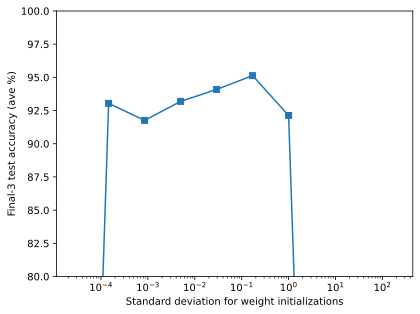

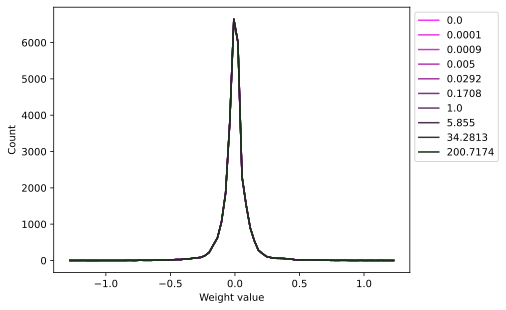

In [30]:
# Visualize the results!
plt.plot(std_arr, accuracy_result, "s-")
plt.xlabel("Standard deviation for weight initializations")
plt.ylabel("Final-3 test accuracy (ave %)")
plt.xscale("log")
plt.ylim([80, 100])
plt.show()

# Visualize the weights distributions
for idx in range(len(std_arr)):
    plt.plot(
        hist_of_data[idx, 0, :],
        hist_of_data[idx, 1, :],
        color=[1 - idx / len(std_arr), 0.2, 1 - idx / len(std_arr)],
    )

plt.xlabel("Weight value")
plt.ylabel("Count")
plt.legend(np.round(std_arr, 4), bbox_to_anchor=(1, 1), loc="upper left")
plt.show()